In [350]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize

In [351]:
m_0 = 20000 #kg
b = 100.0 # kg/sec
f = 300000 # N (kg m/sec^2)
G = 6.674e-11 # N m/kg^2 ( m^2/kg sec^2)
M = 5.972e24 # kg
Omega = 0.0#(2.0*np.pi)/(24*60*60) # 1/sec (number of seconds in a day)
r_earth = 6384000 # m

In [352]:
def func(x,t):
    m = m_0 - b * t
    
    r = x[0]
    theta = x[1]
    p_r = x[2]
    p_theta = x[3]
    psi_r = x[4]
    psi_theta = x[5]
    psi_p_r = x[6]
    psi_p_theta = x[7]
    
    phi = theta + np.arctan2(p_theta/(m*r) - psi_p_r, p_r/m + r*psi_p_theta)
    #print(phi - theta)
    
    r_dot = p_r/m
    theta_dot = p_theta/(m*r**2)
    p_r_dot = -G*M*m/r**2 + p_theta**2/(m*r**3) + f*np.cos(phi - theta)
    p_theta_dot = f*r*np.sin(phi - theta)
    psi_r_dot = - p_theta*f/(m*r**2)*np.sin(phi - theta) + b*p_theta**2/(m**2*r**3) -\
        b*G*M/r**2
    psi_theta_dot = - p_r * f / m * np.sin(phi - theta) -\
        p_theta/(m*r)*f*np.cos(phi - theta) -\
        psi_p_r*f*np.sin(phi - theta) +\
        psi_p_theta*f*r*np.cos(phi - theta)
    psi_p_r_dot = f/m*np.cos(phi - theta) - b*p_r/m**2 - psi_r/m
    psi_p_theta_dot = f/(m*r)*np.sin(phi - theta) - b*p_r/(m*r)**2 -\
        2*psi_p_r*p_theta/(m*r**3) - psi_theta/(m*r**2)
        
    x_dot = np.array([r_dot, theta_dot, p_r_dot, p_theta_dot, psi_r_dot, psi_theta_dot, psi_p_r_dot, psi_p_theta_dot])
    return x_dot

In [353]:
r_0 = r_earth
theta_0 = 0.0
p_r_0 = 0.0
p_theta_0 = m_0*r_earth**2*Omega

initial_heading = 0.0 # straight up at theta=0
initial_angular_velocity = 0.0

In [354]:
psi_r_0 = 0.0
psi_theta_0 = 0.0
psi_p_r_0 = r_earth*Omega
psi_p_theta_0 = 0.25

In [355]:
def heading(psi_p_theta_0):
    x_0[7] = psi_p_theta_0
    x_dot_0 = func(x_0, 0.0)
    phi_dot_0 = x_dot_0[1] + (\
        (p_r_0/m_0 + r_0*psi_p_theta_0)*(x_dot_0[5]/(m_0*r_0) - x_dot_0[6])\
        - (p_theta_0/(m_0*r_0) - psi_p_r_0)*(x_dot_0[2]/m_0 + x_dot_0[0]*psi_p_theta_0 + r_0*x_dot_0[7]))\
        /(p_r_0/m_0 + r_0*psi_p_theta_0)**2 + (p_theta_0/(m_0*r_0) - psi_p_r_0)**2
    return phi_dot_0

In [356]:
minimize_object = minimize(heading, 0.6, tol=1e-10)
phi_dot_0 = minimize_object.x
x_0[7] = phi_dot_0

In [357]:
T = np.linspace(0,20,200)
x_0 = np.array([r_0, theta_0, p_r_0, p_theta_0, psi_r_0, psi_theta_0, psi_p_r_0, psi_p_theta_0])
Y = odeint(func,x_0, T)

In [358]:
orientation = Y[:,1] + np.arctan2(\
    Y[:,3]/((m_0-b*T)*Y[:,0]) - Y[:,6], 
    Y[:,2]/(m_0-b*T) + Y[:,0]*Y[:,7])

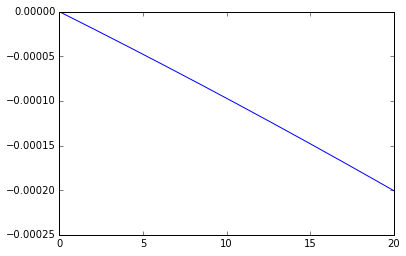

In [359]:
plt.plot(T, orientation)

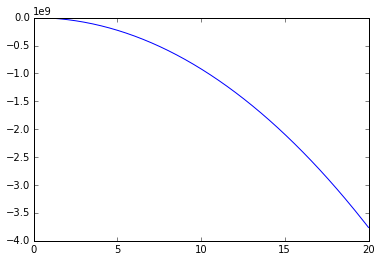

In [360]:
plt.plot(T,Y[:,3])

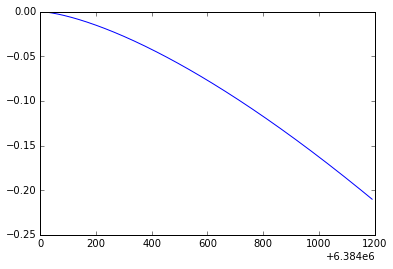

In [361]:
#plt.plot(r_earth*np.cos(np.linspace(0,2*np.pi,2000)), r_earth*np.sin(np.linspace(0,2*np.pi,2000)))
plt.plot(Y[:,0]*np.cos(Y[:,1]), Y[:,0]*np.sin(Y[:,1]))
#plt.axis([r_earth-10.0, r_earth+10.0, -10, 1000]);